In [30]:
import pandas as pd

In [31]:
raw = pd.read_excel('EP51_ASSY.xlsx',sheet_name='Test Result')

In [32]:
raw

,ItemName Type,Process Type,Item,ItemName,Count/Count ESN,Retest%,Comment
0,17886,Epix_pro_RTESN,64,NFC check 檢查,9/635,1.42,NaN
1,17886,Epix_pro_RTESN,75,Check ECG 1907 IOP,8/635,1.26,NaN
2,17886,Epix_pro_RTESN,34,Firmware Checksum Comparison,7/635,1.10,NaN
3,17886,Epix_pro_RTESN,9,Is ESN check in,6/635,0.94,NaN
4,17886,Epix_pro_RTESN,57,光學心跳模組檢查|Check OHRM LED,6/635,0.94,NaN
...,...,...,...,...,...,...,...
162,18307,General_ECG_Sampling,70,Impedance_03 Result,2/14,14.29,NaN
163,18307,General_ECG_Sampling,3,CMRR_01 Result,1/14,7.14,NaN
164,18307,General_ECG_Sampling,39,System_noise Result,1/14,7.14,NaN
165,18307,General_ECG_Sampling,81,Check CMRR Result File Exists,1/14,7.14,NaN


<AxesSubplot: >

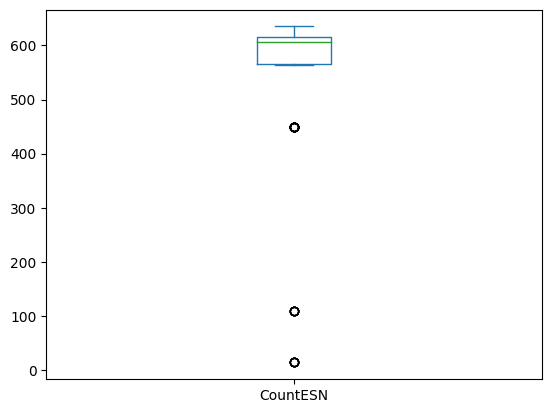

In [36]:
(raw
 .drop('Comment',axis=1)
 .rename(columns = lambda name : name.replace(" ",'').replace('/','').replace('%',''))
 .astype({'ItemNameType':'category','ProcessType':'category','Item':'category','ItemName':'category'})
 .assign(
     CountESN = lambda df : df.CountCountESN.str.split('/').str[1].astype('int16'))
#  .CountESN.describe()
#  .query("CountESN < CountESN.quantile(0.05)") 
 .CountESN.plot.box()
#  .query("CountESN > CountESN.quantile(0.05) and ~ProcessType.str.contains('Pack') and ~ProcessType.str.contains('Click') and Retest >= Retest.mean()")
 )